<a href="https://colab.research.google.com/github/Varun-Mayilvaganan/My_Machine_Learns/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Import the libraries*

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Load the datasets into a pandas dataframe

In [2]:
gold_data = pd.read_csv('/content/FINAL_USO.csv')

In [5]:
print(gold_data.head().to_string())

         Date        Open        High         Low       Close   Adj Close    Volume     SP_open     SP_high      SP_low    SP_close  SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low     DJ_close   DJ_Ajclose  DJ_volume    EG_open    EG_high     EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  EU_high  EU_low  EU_Trend  OF_Price  OF_Open  OF_High  OF_Low  OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  OS_Trend  SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  USB_Price  USB_Open  USB_High  USB_Low  USB_Trend  PLT_Price  PLT_Open  PLT_High  PLT_Low  PLT_Trend  PLD_Price  PLD_Open  PLD_High  PLD_Low  PLD_Trend  RHO_PRICE  USDI_Price  USDI_Open  USDI_High  USDI_Low  USDI_Volume  USDI_Trend   GDX_Open   GDX_High    GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002  21521900  123.029999  123.199997  121.989998  

In [6]:
gold_data.shape

(1718, 81)

In [39]:
gold_data['Adj Close'].value_counts()

122.209999    4
124.589996    4
114.769997    4
116.769997    4
115.779999    4
             ..
119.190002    1
120.930000    1
121.019997    1
118.459999    1
121.059998    1
Name: Adj Close, Length: 1384, dtype: int64

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [12]:
gold_data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [13]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [16]:
correlation = gold_data.corr()

<Figure size 800x800 with 0 Axes>

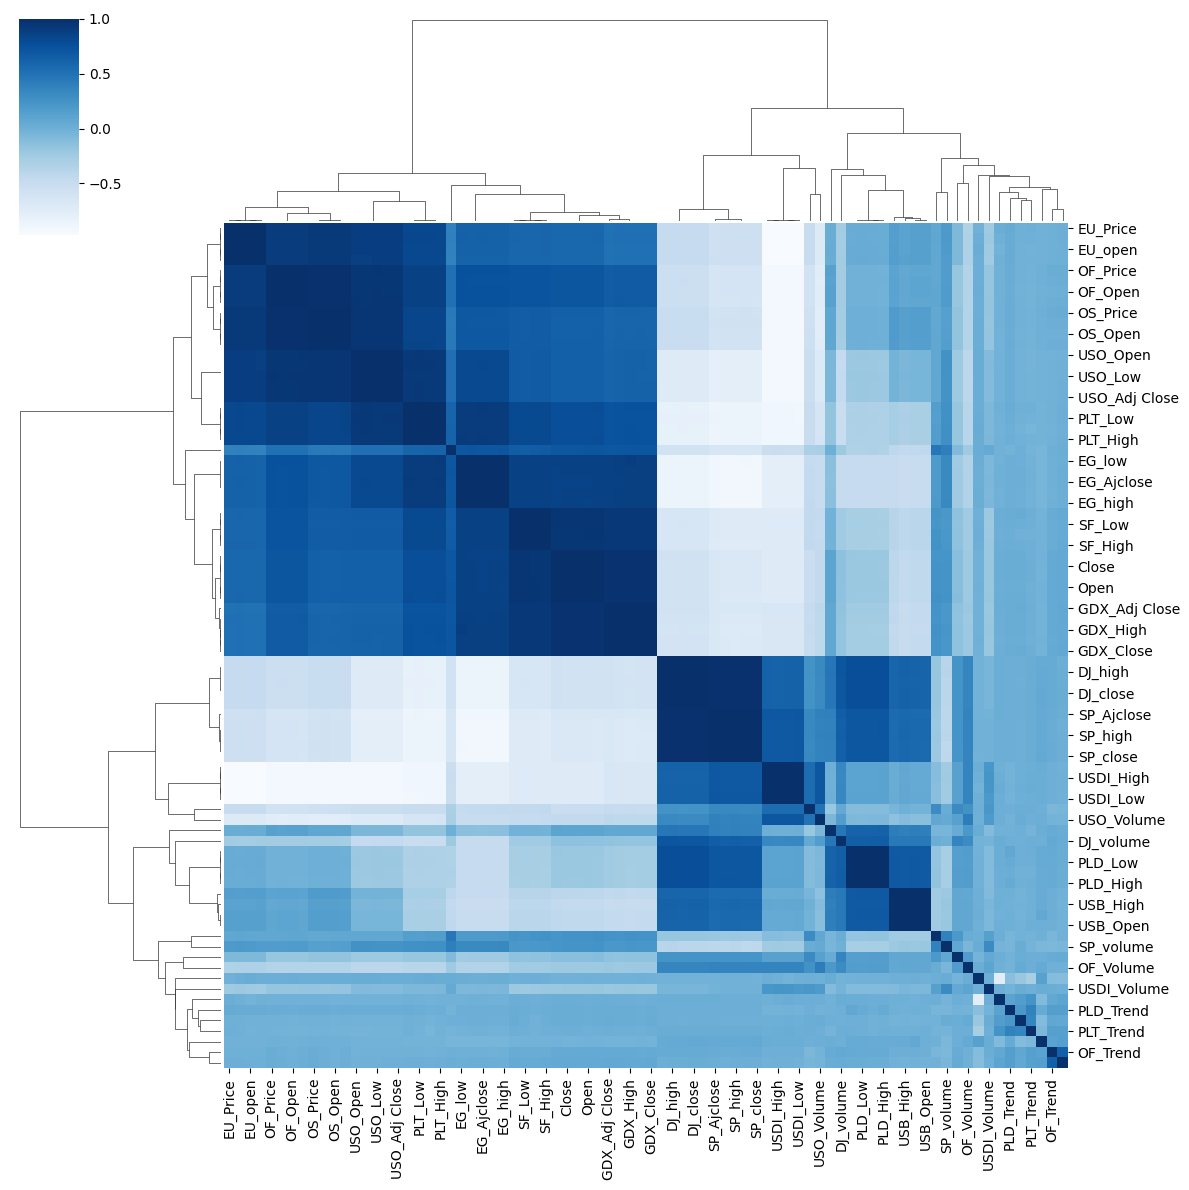

In [22]:
plt.figure(figsize=(8,8))
# sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
sns.clustermap(correlation, cmap='Blues', figsize=(12, 12))

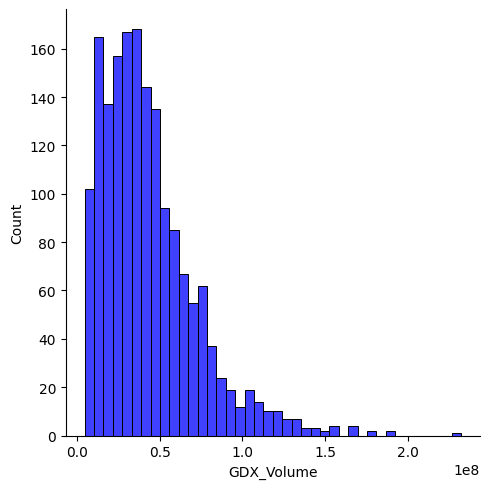

In [29]:
sns.displot(gold_data['GDX_Volume'],color='blue')

In [50]:
new_df = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Trend', 'RHO_PRICE', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close']]

In [51]:
x = new_df.drop("Adj Close" , axis = 1)
y = new_df["Adj Close"]

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [53]:
scale = StandardScaler()
x_train_scaled = scale.fit_transform(X_train)
x_test_scaled = scale.transform(X_test)

In [54]:
model1 = LinearRegression()

In [57]:
model1.fit(x_train_scaled, Y_train)

LinearRegression()

In [60]:
y_pred = model1.predict(x_test_scaled)

print(metrics.r2_score(Y_test , y_pred))

1.0


In [68]:
rid = Ridge(alpha= 1)
rid.fit(x_train_scaled , Y_train)
y_pred = rid.predict(x_test_scaled)

print(metrics.r2_score(Y_test , y_pred))
print(metrics.mean_squared_error(Y_test , y_pred))
print(metrics.mean_absolute_error(Y_test , y_pred))

0.9999248896558741
0.022610812581798156
0.11407642536129325
